# Training the YOLOv5 Object Detector on a Custom Dataset

# Custom Training with YOLOv5

In today’s tutorial, you will learn to train the pretrained YOLOv5 object detector on a custom dataset without writing much code. To do so we will take the following steps:

* Gather a dataset of images and label our dataset
* Export our dataset to YOLOv5 format
* Train YOLOv5 base model to recognize the objects in our dataset
* Visualize Model Artifacts
* Evaluate our YOLOv5 model's performance using mAP
* Run inference with trained model on test dataset
* Train YOLOv5 base model again only this time freeze few layers and fine-tune remaining layers on custom dataset

### Clone YOLOv5 Repository and Install Requirements

In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5/
!pip install -r requirements.txt -qq

Cloning into 'yolov5'...
remote: Enumerating objects: 15921, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 15921 (delta 16), reused 22 (delta 8), pack-reused 15880
Receiving objects: 100% (15921/15921), 14.66 MiB | 9.72 MiB/s, done.
Resolving deltas: 100% (10911/10911), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import os
from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# Create a folder in the root directory
# be careful before running, if it refreshed, data might get lost
# !mkdir -p "/content/drive/My Drive/yolov5scheck"

In [ ]:
# # Write a sample file to Google Drive
# drag the folder and move it to drive

### Download Dataset

In [ ]:
# %cd ..
# !mkdir vehicles_open_image
# %cd vehicles_open_image
# !curl -L -s "https://public.roboflow.com/ds/2Tb6yXY8l8?key=Eg82WpxUEr" > vehicles.zip
# !unzip -q vehicles.zip
# !rm vehicles.zip

In [ ]:
%cd ..
!mkdir vehicles_open_image
%cd vehicles_open_image
# !curl -L -s "https://public.roboflow.com/ds/2Tb6yXY8l8?key=Eg82WpxUEr" > vehicles.zip

# Upload the annotations which was done in roboflow and then we can go and unzip the file. and move the file one directory up.

In [ ]:
# get this file from google drive link - https://drive.google.com/drive/u/9/folders/1Th2tSoVy0BtcRMQkhfMz4TRK4SddznKK
!unzip -q roboflow_nagesh.zip

In [ ]:
# !mv roboflow_nagesh vehicles

In [ ]:
!rm roboflow_nagesh.zip

## Blog Post Code

### Import Packages

In [ ]:
import yaml
import os
import glob
from IPython.display import Image, display

### Create Data Configuration

In [ ]:
config = {
    "path": "/content/vehicles_open_image",
    "train": "/content/vehicles_open_image/train",
    "val": "/content/vehicles_open_image/valid",
    "nc": 5,
    "names": ["nagesh", "unknown"]
}

with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

%cd /content/yolov5

/content/yolov5


### Define Hyperparameters for the Model

In [ ]:
SIZE = 640
BATCH_SIZE = 32
EPOCHS = 100
MODEL = "yolov5s"
WORKERS = 1
PROJECT = "parking_lot"
RUN_NAME = f"{MODEL}_size{SIZE}_epochs{EPOCHS}_batch{BATCH_SIZE}_small"

### Training with all layers

In [ ]:
!python train.py --img {SIZE}\
                --batch {BATCH_SIZE}\
                --epochs {EPOCHS}\
                --data ../vehicles_open_image/data.yaml\
                --weights {MODEL}.pt\
                --workers {WORKERS}\
                --project {PROJECT}\
                --name {RUN_NAME}\

In [ ]:
print("/content/yolov5/parking_lot/yolov5s_size640_epochs20_batch32_small/train_batch0.jpg")
# /content/yolov5/parking_lot/yolov5s_size640_epochs20_batch32_small\/train_batch0.jpg

### Detector Sample Training Data and Performance Metrics

In [ ]:
# runs_directory = "/content/yolov5/parking_lot/yolov5s_size640_epochs20_batch32_small"
runs_directory = "/content/yolov5/parking_lot/yolov5s_size640_epochs100_batch32_small"

display(
    Image(
        filename=f"{runs_directory}\/train_batch0.jpg"
    )
)

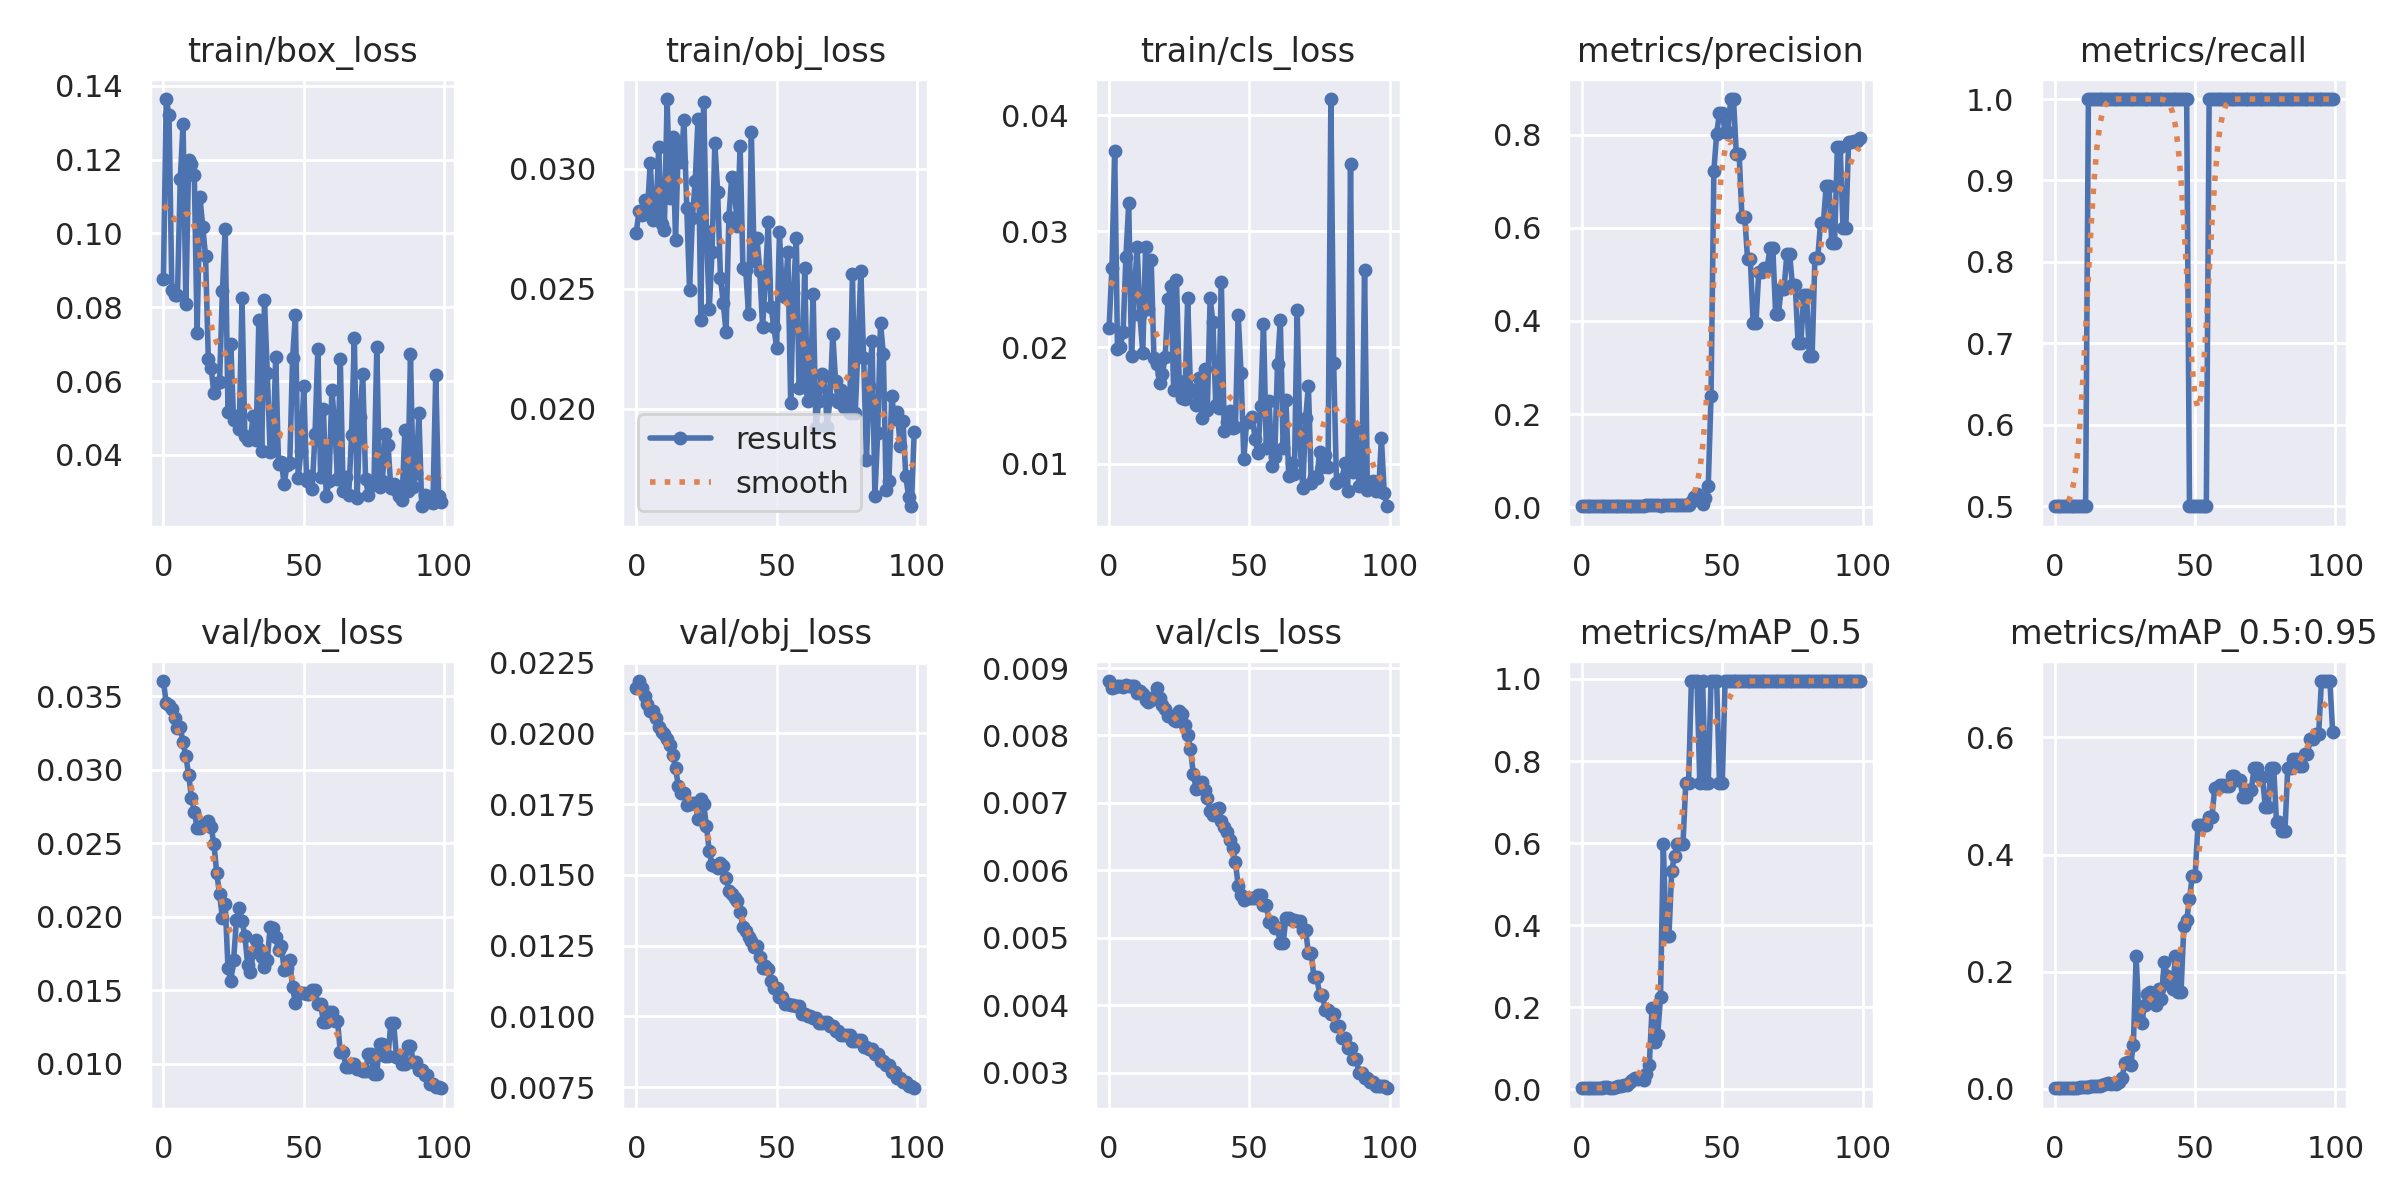

In [ ]:
display(
    Image(
        filename=f"{runs_directory}\/results.png"
    )
)

In [ ]:
runs_directory = "/content/yolov5/parking_lot/yolov5s_size640_epochs100_batch32_small"

print(runs_directory + "/val_batch2_labels.jpg")

In [ ]:
# sometimes the "val_batch0_labels" wont get created and throw file missing error
# check the file and rename it accordingly
display(
    Image(
        filename=f"{runs_directory}\/val_batch0_labels.jpg"
    )
)
print("\n")
display(
    Image(
        filename=f"{runs_directory}\/val_batch0_pred.jpg"
    )
)

### Run Inference  With Trained Weights

Run inference with a pretrained pytorch checkpoint on contents of `test/images` folder inside the `vehicles_open_image` dataset.

In [ ]:
%cd "/content/yolov5/parking_lot/yolov5s_size640_epochs100_batch32_small\/weights"
PROJECT = "parking_lot"
RUN_NAME = f"{MODEL}_size{SIZE}_epochs{EPOCHS}_batch{BATCH_SIZE}_small"
# /content/yolov5/yolov5s.pt
# !python detect.py --weights {runs_directory}/weights/best.pt\
# !python detect.py --weights /content/yolov5/yolov5s.pt\
!python "/content/yolov5/detect.py" --weights best.pt\
                  --source /content/vehicles_open_image/test/images\
                  --conf 0.1\
                  --data /content/vehicles_open_image/data.yaml\
                  --project /content/yolov5/parking_lot/yolov5s_size640_epochs100_batch32_small\
                  --name test_data_detections

In [ ]:
# display(
#     Image(
#         filename=f"{runs_directory}\/val_batch2_pred.jpg"
#     )
# )

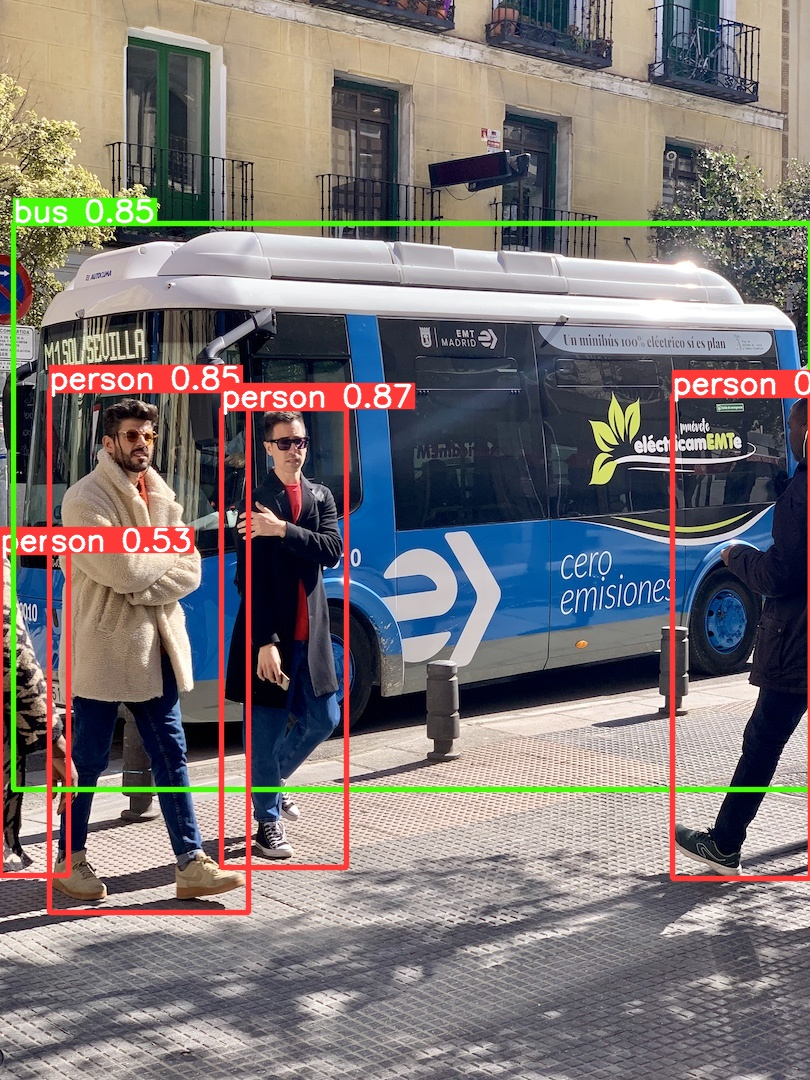

In [ ]:
display(
    Image(
        filename=f"/content/yolov5/runs/detect/exp/bus.jpg"
    )
)

In [ ]:
# # display inference on few test images
# # /content/yolov5/parking_lot/yolov5s_size640_epochs20_batch32_small/test_data_detections3/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg
# # /content/yolov5/parking_lot/yolov5s_size640_epochs20_batch32_small/test_data_detections
# runs_directory_1 = "/content/yolov5/parking_lot/yolov5s_size640_epochs20_batch32_small/test_data_detections"
# for imageName in glob.glob(runs_directory_1+'/*.jpg')[60:65]:
#     # print(imageName)
#     display(Image(filename=imageName))
#     print("\n")

In [ ]:
# display inference on few test images
# /content/yolov5/parking_lot/yolov5s_size640_epochs20_batch32_small/test_data_detections3/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg
# /content/yolov5/parking_lot/yolov5s_size640_epochs20_batch32_small/test_data_detections
runs_directory_1 = "/content/yolov5/parking_lot/yolov5s_size640_epochs100_batch32_small/test_data_detections10"
for imageName in glob.glob(runs_directory_1+'*.jpg'):  # [60:65]:
    print("imageName")
    # display(Image(filename=imageName))
    print("\n")

### Fine-tuning with 10 layers freezed

In [ ]:
PROJECT = "nagesh"
EPOCHS = 50
!python train.py --img {SIZE}\
                --batch {BATCH_SIZE}\
                --epochs {EPOCHS}\
                --data ../vehicles_open_image/data.yaml\
                --weights {MODEL}.pt\
                --workers {WORKERS}\
                --project {PROJECT}\
                --name freeze_layers\
                # --freeze 0 1 2 3 4 5 6 7 8 9 10

train: weights=yolov5s.pt, cfg=, data=../vehicles_open_image/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=nagesh, name=freeze_layers, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.

### Performance Metric of Freeze Model

In [ ]:
# runs_directory = "parking_lot/freeze_layers"
runs_directory = "/content/yolov5/nagesh/freeze_layers"

display(
    Image(
        filename=f"{runs_directory}/train_batch0.jpg"
    )
)

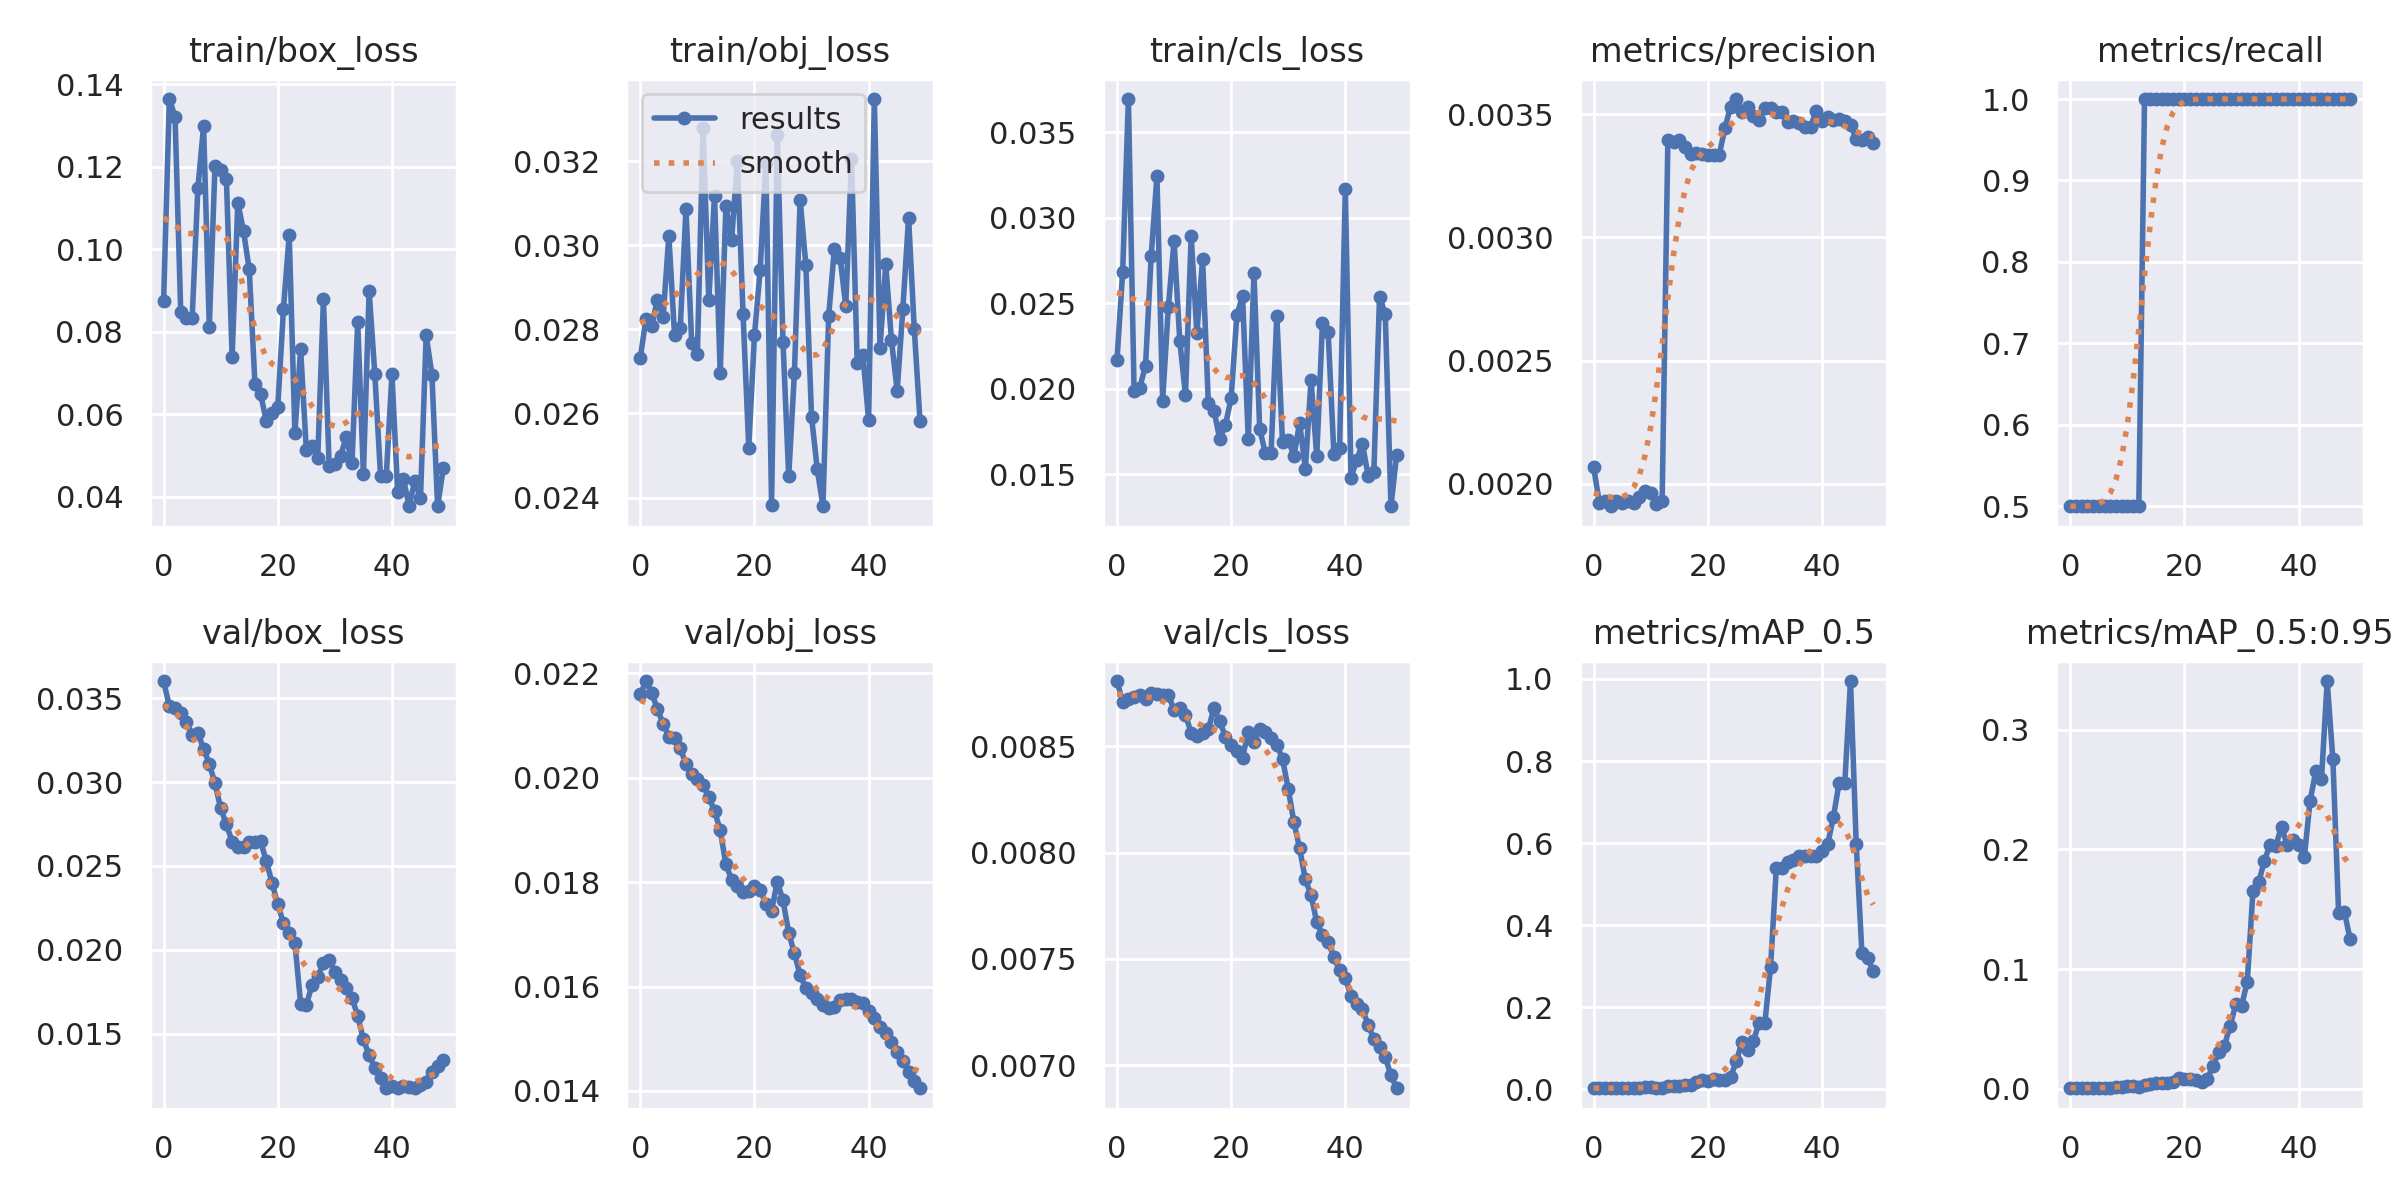

In [ ]:
display(
    Image(
        filename=f"{runs_directory}/results.png"
    )
)

In [ ]:
runs_directory = "/content/yolov5/nagesh/freeze_layers/"

display(
    Image(
        filename=f"{runs_directory}val_batch0_labels.jpg"
    )
)
print('\n')
display(
    Image(
        filename=f"{runs_directory}val_batch0_pred.jpg"
    )
)

### Run Inference  With Trained Weights

Run inference with a pretrained pytorch checkpoint on contents of `test/images` folder inside the `vehicles_open_image` dataset.

In [ ]:
# tranining path for nagesh - /content/yolov5/parking_lot/freeze_layers/weights/best.pt
# !python detect.py --weights {runs_directory}/weights/best.pt\


PROJECT = "nagesh"
# traning with all layter checkpoint
# /content/yolov5/parking_lot/yolov5s_size640_epochs20_batch32_small\/weights/best.pt
# traning again
# /content/yolov5/nagesh/freeze_layers/weights/best.pt
!python detect.py --weights /content/yolov5/parking_lot/yolov5s_size640_epochs20_batch32_small/weights/best.pt\
                  --source ../vehicles_open_image/test/images\
                  --conf 0.1\
                  --data /content/vehicles_open_image/data.yaml\
                  --project {runs_directory}\
                  --name test_data_detections

In [ ]:
# display inference on few test images
# /content/yolov5/parking_lot/freeze_layers/test_data_detections/4_unknown_jpeg.rf.18c7102bdb7d177ce240c5e367353b04.jpg
# /content/yolov5/nagesh/freeze_layers2/temp/exp/4_unknown_jpeg.rf.18c7102bdb7d177ce240c5e367353b04.jpg
runs_directory = "/content/yolov5/nagesh/freeze_layers/temp/exp/"

# for imageName in glob.glob(f"{runs_directory}//test_data_detections2/*.jpg")[:]:
#     display(Image(filename=imageName))
#     print("\n")

display(
    Image(
        filename=f"{runs_directory}4_unknown_jpeg.rf.18c7102bdb7d177ce240c5e367353b04.jpg"
    )
)